# House Price Prediction

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

In [ ]:
url1 = 'https://drive.google.com/file/d/1p4BNeW3kp7-Ruiukio3q25O_SA2pICCY/view'
url1 ='https://drive.google.com/uc?id=' + url1.split('/')[-2]
data1 = pd.read_csv(url1)
data1.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,127845.0,128190.0,128554.0,129295.0,130042.0,...,337752.0,343294.0,348315.0,352484.0,354884.0,355924.0,356279.0,356785.0,357296.0,357319.0
1,394913,1,"New York, NY",msa,NY,222885.0,224217.0,225415.0,227774.0,229970.0,...,587159.0,594234.0,601691.0,607653.0,611940.0,614208.0,615185.0,615662.0,616681.0,617849.0
2,753899,2,"Los Angeles, CA",msa,CA,230273.0,231075.0,232303.0,234638.0,237142.0,...,904811.0,923996.0,940540.0,941881.0,938738.0,924623.0,914991.0,905397.0,900776.0,897894.0
3,394463,3,"Chicago, IL",msa,IL,167528.0,167923.0,168434.0,169458.0,170543.0,...,295653.0,299069.0,302975.0,305916.0,307737.0,308055.0,308352.0,308969.0,309456.0,308959.0
4,394514,4,"Dallas, TX",msa,TX,128766.0,128869.0,128955.0,129164.0,129383.0,...,363776.0,373139.0,381724.0,389176.0,391350.0,390417.0,388728.0,388858.0,388704.0,386853.0
5,394692,5,"Houston, TX",msa,TX,125560.0,125638.0,125520.0,125638.0,125645.0,...,292215.0,298181.0,303726.0,307889.0,310472.0,311708.0,312069.0,312657.0,313283.0,312952.0
6,395209,6,"Washington, DC",msa,VA,190329.0,190571.0,190945.0,191739.0,192842.0,...,536109.0,541462.0,545805.0,548084.0,548723.0,547685.0,547681.0,548808.0,550460.0,551220.0
7,394856,7,"Miami, FL",msa,FL,123584.0,124039.0,124446.0,125248.0,125908.0,...,413495.0,424022.0,437311.0,448908.0,459445.0,465946.0,469861.0,471305.0,474405.0,475854.0
8,394974,8,"Philadelphia, PA",msa,PA,129133.0,129566.0,129826.0,130472.0,130995.0,...,321019.0,324676.0,328973.0,332438.0,335051.0,336121.0,337277.0,338871.0,341120.0,343096.0
9,394347,9,"Atlanta, GA",msa,GA,153363.0,153873.0,154398.0,155461.0,156499.0,...,359019.0,366420.0,373624.0,378969.0,381518.0,382512.0,382347.0,381795.0,381786.0,381245.0


In [ ]:
data1.shape

(893, 281)

In [ ]:
url2 = 'https://drive.google.com/file/d/1HfTP590blvZIYS3MhlQyZK3or4lgIGaV/view'
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
data2 = pd.read_csv(url2)
data2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,96603.0,...,232376.0,236021.0,239693.0,244103.0,249528.0,255561.0,261406.0,266140.0,269363.0,271087.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,163540.0,...,330128.0,334969.0,339733.0,346806.0,355476.0,365971.0,374539.0,379908.0,381471.0,380327.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,87170.0,...,167760.0,169442.0,171444.0,173448.0,175569.0,178832.0,182377.0,185780.0,188090.0,189856.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,324450.0,...,814606.0,815163.0,817786.0,818496.0,823195.0,827059.0,836542.0,842837.0,849412.0,852484.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,279395.0,...,749033.0,750202.0,754601.0,758353.0,764191.0,766694.0,772804.0,778368.0,783167.0,785138.0


In [ ]:
data2.shape

(23404, 281)

# Data Cleaning

In [ ]:
amal_data1 = data1.drop(columns=['RegionID','RegionType','StateName', 'SizeRank'])

In [ ]:
amal_data2 = data2.drop(columns=['RegionID','RegionType','StateName', 'SizeRank', 'State', 'City','Metro','CountyName'])

In [ ]:
#amal_data1 = amal_data1.transpose()

In [ ]:
#amal_data2 = amal_data2.transpose()

In [ ]:
amal_data1

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,United States,127845.0,128190.0,128554.0,129295.0,130042.0,130787.0,131547.0,132357.0,133184.0,...,337752.0,343294.0,348315.0,352484.0,354884.0,355924.0,356279.0,356785.0,357296.0,357319.0
1,"New York, NY",222885.0,224217.0,225415.0,227774.0,229970.0,232308.0,234765.0,237308.0,239859.0,...,587159.0,594234.0,601691.0,607653.0,611940.0,614208.0,615185.0,615662.0,616681.0,617849.0
2,"Los Angeles, CA",230273.0,231075.0,232303.0,234638.0,237142.0,239506.0,241927.0,244468.0,246887.0,...,904811.0,923996.0,940540.0,941881.0,938738.0,924623.0,914991.0,905397.0,900776.0,897894.0
3,"Chicago, IL",167528.0,167923.0,168434.0,169458.0,170543.0,171618.0,172808.0,174143.0,175522.0,...,295653.0,299069.0,302975.0,305916.0,307737.0,308055.0,308352.0,308969.0,309456.0,308959.0
4,"Dallas, TX",128766.0,128869.0,128955.0,129164.0,129383.0,129566.0,129763.0,130126.0,130576.0,...,363776.0,373139.0,381724.0,389176.0,391350.0,390417.0,388728.0,388858.0,388704.0,386853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,"Zapata, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122478.0,122759.0,122752.0,123793.0,125023.0,126537.0,127550.0,128146.0,128088.0,127332.0
889,"Ketchikan, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,375894.0,376390.0,378276.0,381933.0,385269.0,388616.0,390850.0,393137.0,393589.0,393453.0
890,"Craig, CO",101674.0,102043.0,102669.0,103412.0,104179.0,104758.0,105932.0,106654.0,106798.0,...,271945.0,272106.0,273108.0,277250.0,281998.0,287093.0,289368.0,291121.0,285704.0,279206.0
891,"Lamesa, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106786.0,107915.0,109081.0,110737.0,112532.0,113743.0,114038.0,114339.0,113534.0,112769.0


In [ ]:
X_data1 = amal_data1[['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31','2009-12-31','2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31','2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']].fillna(method="ffill")
y_data1 = amal_data1['2022-12-31'].fillna(method="ffill")

In [ ]:
path = r'https://drive.google.com/drive/folders/1JecrqfxFAOKLJ7UiSMRSXr2_AjG8Bq4K?usp=share_link/house_cleaned_list_price_data.csv'
amal_data1.to_csv(path, index=False)

In [ ]:
data1

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,127845.0,128190.0,128554.0,129295.0,130042.0,...,337752.0,343294.0,348315.0,352484.0,354884.0,355924.0,356279.0,356785.0,357296.0,357319.0
1,394913,1,"New York, NY",msa,NY,222885.0,224217.0,225415.0,227774.0,229970.0,...,587159.0,594234.0,601691.0,607653.0,611940.0,614208.0,615185.0,615662.0,616681.0,617849.0
2,753899,2,"Los Angeles, CA",msa,CA,230273.0,231075.0,232303.0,234638.0,237142.0,...,904811.0,923996.0,940540.0,941881.0,938738.0,924623.0,914991.0,905397.0,900776.0,897894.0
3,394463,3,"Chicago, IL",msa,IL,167528.0,167923.0,168434.0,169458.0,170543.0,...,295653.0,299069.0,302975.0,305916.0,307737.0,308055.0,308352.0,308969.0,309456.0,308959.0
4,394514,4,"Dallas, TX",msa,TX,128766.0,128869.0,128955.0,129164.0,129383.0,...,363776.0,373139.0,381724.0,389176.0,391350.0,390417.0,388728.0,388858.0,388704.0,386853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,122478.0,122759.0,122752.0,123793.0,125023.0,126537.0,127550.0,128146.0,128088.0,127332.0
889,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,375894.0,376390.0,378276.0,381933.0,385269.0,388616.0,390850.0,393137.0,393589.0,393453.0
890,753874,925,"Craig, CO",msa,CO,101674.0,102043.0,102669.0,103412.0,104179.0,...,271945.0,272106.0,273108.0,277250.0,281998.0,287093.0,289368.0,291121.0,285704.0,279206.0
891,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,106786.0,107915.0,109081.0,110737.0,112532.0,113743.0,114038.0,114339.0,113534.0,112769.0


In [ ]:
amal_data1

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,United States,127845.0,128190.0,128554.0,129295.0,130042.0,130787.0,131547.0,132357.0,133184.0,...,337752.0,343294.0,348315.0,352484.0,354884.0,355924.0,356279.0,356785.0,357296.0,357319.0
1,"New York, NY",222885.0,224217.0,225415.0,227774.0,229970.0,232308.0,234765.0,237308.0,239859.0,...,587159.0,594234.0,601691.0,607653.0,611940.0,614208.0,615185.0,615662.0,616681.0,617849.0
2,"Los Angeles, CA",230273.0,231075.0,232303.0,234638.0,237142.0,239506.0,241927.0,244468.0,246887.0,...,904811.0,923996.0,940540.0,941881.0,938738.0,924623.0,914991.0,905397.0,900776.0,897894.0
3,"Chicago, IL",167528.0,167923.0,168434.0,169458.0,170543.0,171618.0,172808.0,174143.0,175522.0,...,295653.0,299069.0,302975.0,305916.0,307737.0,308055.0,308352.0,308969.0,309456.0,308959.0
4,"Dallas, TX",128766.0,128869.0,128955.0,129164.0,129383.0,129566.0,129763.0,130126.0,130576.0,...,363776.0,373139.0,381724.0,389176.0,391350.0,390417.0,388728.0,388858.0,388704.0,386853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,"Zapata, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122478.0,122759.0,122752.0,123793.0,125023.0,126537.0,127550.0,128146.0,128088.0,127332.0
889,"Ketchikan, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,375894.0,376390.0,378276.0,381933.0,385269.0,388616.0,390850.0,393137.0,393589.0,393453.0
890,"Craig, CO",101674.0,102043.0,102669.0,103412.0,104179.0,104758.0,105932.0,106654.0,106798.0,...,271945.0,272106.0,273108.0,277250.0,281998.0,287093.0,289368.0,291121.0,285704.0,279206.0
891,"Lamesa, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106786.0,107915.0,109081.0,110737.0,112532.0,113743.0,114038.0,114339.0,113534.0,112769.0


In [ ]:
amal_data2

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,77449,96603.0,96618.0,96448.0,96469.0,96525.0,96681.0,96773.0,96916.0,97269.0,...,232376.0,236021.0,239693.0,244103.0,249528.0,255561.0,261406.0,266140.0,269363.0,271087.0
1,77494,163540.0,163790.0,164054.0,164736.0,164592.0,164357.0,163287.0,163089.0,162523.0,...,330128.0,334969.0,339733.0,346806.0,355476.0,365971.0,374539.0,379908.0,381471.0,380327.0
2,79936,87170.0,87231.0,87281.0,87299.0,87355.0,87358.0,87355.0,87321.0,86777.0,...,167760.0,169442.0,171444.0,173448.0,175569.0,178832.0,182377.0,185780.0,188090.0,189856.0
3,11368,324450.0,328421.0,331099.0,335415.0,338539.0,341713.0,345893.0,349797.0,353669.0,...,814606.0,815163.0,817786.0,818496.0,823195.0,827059.0,836542.0,842837.0,849412.0,852484.0
4,11385,279395.0,280318.0,281786.0,283552.0,284726.0,285687.0,286367.0,289142.0,291663.0,...,749033.0,750202.0,754601.0,758353.0,764191.0,766694.0,772804.0,778368.0,783167.0,785138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23399,46799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157257.0,160065.0,162584.0,165641.0,166776.0,168208.0,169037.0,170919.0,172515.0,174173.0
23400,77451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,211125.0,211719.0,210235.0,205233.0
23401,14441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147462.0,149161.0
23402,26576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86012.0,87789.0,89386.0,91390.0,91966.0,93260.0,94337.0,95119.0,95557.0,95880.0


# Data Amalgamation

In [ ]:
amal_data2['RegionName'] = amal_data2['RegionName'].astype(str)
df = amal_data1.merge(amal_data2, how = 'outer')
print(df)

            RegionName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  \
0        United States    127845.0    128190.0    128554.0    129295.0   
1         New York, NY    222885.0    224217.0    225415.0    227774.0   
2      Los Angeles, CA    230273.0    231075.0    232303.0    234638.0   
3          Chicago, IL    167528.0    167923.0    168434.0    169458.0   
4           Dallas, TX    128766.0    128869.0    128955.0    129164.0   
...                ...         ...         ...         ...         ...   
24292            46799         NaN         NaN         NaN         NaN   
24293            77451         NaN         NaN         NaN         NaN   
24294            14441         NaN         NaN         NaN         NaN   
24295            26576         NaN         NaN         NaN         NaN   
24296            50160         NaN         NaN         NaN         NaN   

       2000-05-31  2000-06-30  2000-07-31  2000-08-31  2000-09-30  ...  \
0        130042.0    130787.0    1315

Filling in NaN values

In [ ]:
df = df.fillna(df.mean())

<ipython-input-95-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [ ]:
df.isna()

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24293,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.round(2)

In [ ]:
df

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,United States,127845.0,128190.0,128554.00,129295.00,130042.00,130787.00,131547.0,132357.00,133184.00,...,337752.00,343294.00,348315.00,352484.0,354884.0,355924.0,356279.00,356785.00,357296.00,357319.00
1,"New York, NY",222885.0,224217.0,225415.00,227774.00,229970.00,232308.00,234765.0,237308.00,239859.00,...,587159.00,594234.00,601691.00,607653.0,611940.0,614208.0,615185.00,615662.00,616681.00,617849.00
2,"Los Angeles, CA",230273.0,231075.0,232303.00,234638.00,237142.00,239506.00,241927.0,244468.00,246887.00,...,904811.00,923996.00,940540.00,941881.0,938738.0,924623.0,914991.00,905397.00,900776.00,897894.00
3,"Chicago, IL",167528.0,167923.0,168434.00,169458.00,170543.00,171618.00,172808.0,174143.00,175522.00,...,295653.00,299069.00,302975.00,305916.0,307737.0,308055.0,308352.00,308969.00,309456.00,308959.00
4,"Dallas, TX",128766.0,128869.0,128955.00,129164.00,129383.00,129566.00,129763.0,130126.00,130576.00,...,363776.00,373139.00,381724.00,389176.0,391350.0,390417.0,388728.00,388858.00,388704.00,386853.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,46799,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,166776.00,168208.00,169037.00,170919.0,172515.0,174173.0,272538.43,274871.06,275285.17,275077.53
24293,77451,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,329768.26,334466.78,211125.00,211719.0,210235.0,205233.0,272538.43,274871.06,275285.17,275077.53
24294,14441,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,329768.26,334466.78,338584.71,341497.8,147462.0,149161.0,272538.43,274871.06,275285.17,275077.53
24295,26576,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,91966.00,93260.00,94337.00,95119.0,95557.0,95880.0,272538.43,274871.06,275285.17,275077.53


In [ ]:
X_df = df[['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31','2009-12-31','2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31','2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']]
y_df = df['2022-12-31']

# Importing third dataset for latent variables

In [ ]:
# url3 = 'https://drive.google.com/file/d/1lKFZEqth_T9wFHN2XTxOhSRwFek1hi9Z/view'
# url3 ='https://drive.google.com/uc?id=' + url3.split('/')[-2]
# data3 = pd.read_csv(url3)
# data3.head(10)

url3 = 'https://drive.google.com/file/d/1paSdcAVmtMVaT4kmYVcuVUInfEISik_W/view'
url3 ='https://drive.google.com/uc?id=' + url3.split('/')[-2]
data3 = pd.read_csv(url3)
data3.head(10)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910,1
6,22.9,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170,1
7,22.1,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075,1
8,16.5,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302,0
9,18.9,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727,0


# Investigating relations of pricing with features

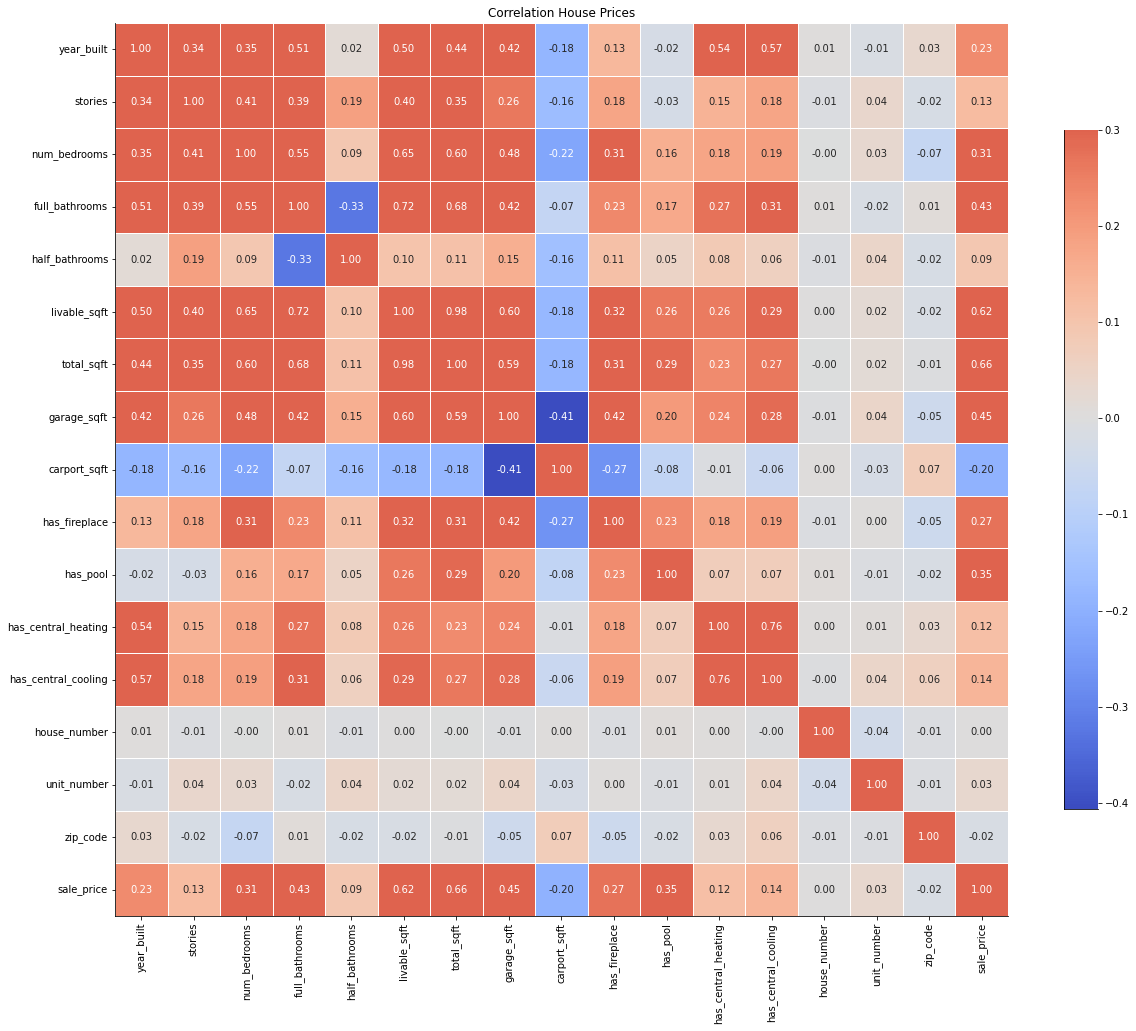

In [ ]:
# corr = data3.corr()
# g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
# sns.despine()
# g.figure.set_size_inches(20,25)
# plt.title('Correlation House Prices')
# plt.show()

In [ ]:
# corr_pairs = corr.unstack()
# sorted_pairs = corr_pairs.sort_values(kind="quicksort")
# #print(corr_pairs)
# print(sorted_pairs)

carport_sqft    garage_sqft      -0.406683
garage_sqft     carport_sqft     -0.406683
half_bathrooms  full_bathrooms   -0.326024
full_bathrooms  half_bathrooms   -0.326024
carport_sqft    has_fireplace    -0.268507
                                    ...   
full_bathrooms  full_bathrooms    1.000000
num_bedrooms    num_bedrooms      1.000000
stories         stories           1.000000
zip_code        zip_code          1.000000
sale_price      sale_price        1.000000
Length: 289, dtype: float64


In [ ]:
# strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
# print(strong_pairs)

year_built           livable_sqft           0.501600
livable_sqft         year_built             0.501600
full_bathrooms       year_built             0.507460
year_built           full_bathrooms         0.507460
                     has_central_heating    0.535366
has_central_heating  year_built             0.535366
num_bedrooms         full_bathrooms         0.547654
full_bathrooms       num_bedrooms           0.547654
year_built           has_central_cooling    0.566484
has_central_cooling  year_built             0.566484
garage_sqft          total_sqft             0.586785
total_sqft           garage_sqft            0.586785
garage_sqft          livable_sqft           0.597781
livable_sqft         garage_sqft            0.597781
num_bedrooms         total_sqft             0.599964
total_sqft           num_bedrooms           0.599964
sale_price           livable_sqft           0.622061
livable_sqft         sale_price             0.622061
                     num_bedrooms           0.

In [ ]:
# latent_data = data3[['livable_sqft', 'total_sqft']]
# print(latent_data)

       livable_sqft  total_sqft
0              1689        1859
1              1984        2002
2              1581        1578
3              1829        2277
4              1580        1749
...             ...         ...
42698           591         627
42699           592         624
42700           594         618
42701          1398        1401
42702          1401        1406

[42703 rows x 2 columns]


# Adding latent variables to amalgamated dataset

In [ ]:
# latent_plus_data = pd.concat([df, latent_data])

In [ ]:
latent_plus_data

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,livable_sqft,total_sqft
0,United States,127845.0,128190.0,128554.0,129295.0,130042.0,130787.0,131547.0,132357.0,133184.0,...,348315.0,352484.0,354884.0,355924.0,356279.0,356785.0,357296.0,357319.0,NaN,NaN
1,"New York, NY",222885.0,224217.0,225415.0,227774.0,229970.0,232308.0,234765.0,237308.0,239859.0,...,601691.0,607653.0,611940.0,614208.0,615185.0,615662.0,616681.0,617849.0,NaN,NaN
2,"Los Angeles, CA",230273.0,231075.0,232303.0,234638.0,237142.0,239506.0,241927.0,244468.0,246887.0,...,940540.0,941881.0,938738.0,924623.0,914991.0,905397.0,900776.0,897894.0,NaN,NaN
3,"Chicago, IL",167528.0,167923.0,168434.0,169458.0,170543.0,171618.0,172808.0,174143.0,175522.0,...,302975.0,305916.0,307737.0,308055.0,308352.0,308969.0,309456.0,308959.0,NaN,NaN
4,"Dallas, TX",128766.0,128869.0,128955.0,129164.0,129383.0,129566.0,129763.0,130126.0,130576.0,...,381724.0,389176.0,391350.0,390417.0,388728.0,388858.0,388704.0,386853.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,627.0
42699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592.0,624.0
42700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594.0,618.0
42701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1398.0,1401.0


In [ ]:
latent_plus_data = round(latent_plus_data.fillna(latent_plus_data.mean()), 2)

<ipython-input-107-eab9da3f548b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  latent_plus_data = round(latent_plus_data.fillna(latent_plus_data.mean()), 2)


In [ ]:
latent_plus_data

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,livable_sqft,total_sqft
0,United States,127845.0,128190.0,128554.00,129295.00,130042.00,130787.00,131547.0,132357.00,133184.00,...,348315.00,352484.0,354884.0,355924.00,356279.00,356785.00,357296.00,357319.00,1987.76,2127.16
1,"New York, NY",222885.0,224217.0,225415.00,227774.00,229970.00,232308.00,234765.0,237308.00,239859.00,...,601691.00,607653.0,611940.0,614208.00,615185.00,615662.00,616681.00,617849.00,1987.76,2127.16
2,"Los Angeles, CA",230273.0,231075.0,232303.00,234638.00,237142.00,239506.00,241927.0,244468.00,246887.00,...,940540.00,941881.0,938738.0,924623.00,914991.00,905397.00,900776.00,897894.00,1987.76,2127.16
3,"Chicago, IL",167528.0,167923.0,168434.00,169458.00,170543.00,171618.00,172808.0,174143.00,175522.00,...,302975.00,305916.0,307737.0,308055.00,308352.00,308969.00,309456.00,308959.00,1987.76,2127.16
4,"Dallas, TX",128766.0,128869.0,128955.00,129164.00,129383.00,129566.00,129763.0,130126.00,130576.00,...,381724.00,389176.0,391350.0,390417.00,388728.00,388858.00,388704.00,386853.00,1987.76,2127.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,NaN,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,338584.71,341497.8,343170.8,343771.86,272538.43,274871.06,275285.17,275077.53,591.00,627.00
42699,NaN,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,338584.71,341497.8,343170.8,343771.86,272538.43,274871.06,275285.17,275077.53,592.00,624.00
42700,NaN,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,338584.71,341497.8,343170.8,343771.86,272538.43,274871.06,275285.17,275077.53,594.00,618.00
42701,NaN,151672.3,151993.4,152399.96,153506.02,154595.47,155753.06,156974.6,158111.11,159278.84,...,338584.71,341497.8,343170.8,343771.86,272538.43,274871.06,275285.17,275077.53,1398.00,1401.00


In [ ]:
latent_plus_data.isna()

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,livable_sqft,total_sqft
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42699,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42700,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42701,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# latent_plus_data.iloc[:,1:277]
# mean_values = latent_plus_data.iloc[:,1:277].mean(axis=0)

In [ ]:
latent_plus_data.columns

Index(['RegionName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
       '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
       ...
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31', 'livable_sqft', 'total_sqft'],
      dtype='object', length=279)

In [ ]:
loop_df = latent_plus_data[['RegionName', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31','2009-12-31','2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31','2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31','livable_sqft', 'total_sqft']]
loop_df.head()

,RegionName,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,...,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31,livable_sqft,total_sqft
0,United States,135717.0,145289.0,155660.0,167918.0,186105.0,207955.0,217585.0,212159.0,191618.0,...,201209.0,212778.0,226647.0,240271.0,249046.0,269746.0,322565.0,357319.0,1987.76,2127.16
1,"New York, NY",247080.0,277419.0,315467.0,358246.0,407807.0,462944.0,477390.0,462886.0,429458.0,...,413905.0,427368.0,450500.0,472746.0,476328.0,508526.0,572245.0,617849.0,1987.76,2127.16
2,"Los Angeles, CA",253307.0,281459.0,331247.0,396026.0,502650.0,594916.0,624000.0,573813.0,449841.0,...,557500.0,592346.0,632915.0,664226.0,671724.0,733144.0,864359.0,897894.0,1987.76,2127.16
3,"Chicago, IL",179316.0,193834.0,208155.0,222873.0,241167.0,262313.0,272222.0,267140.0,239502.0,...,205202.0,215652.0,227580.0,235831.0,238031.0,252793.0,287280.0,308959.0,1987.76,2127.16
4,"Dallas, TX",132066.0,132825.0,138175.0,140221.0,149726.0,153096.0,157926.0,159820.0,150732.0,...,191091.0,211599.0,230693.0,246752.0,252958.0,271644.0,340078.0,386853.0,1987.76,2127.16


In [ ]:
X_no_latent = loop_df.iloc[:, 1:23]
y_no_latent = loop_df['2022-12-31']

In [ ]:
X_latent = loop_df.drop(['RegionName','2022-12-31'], axis = 1)
y_latent = loop_df['2022-12-31']

### Muller Loop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
names = [
    "Linear Regression",
    "MLP Regressor",
    "RandomForest Regressor",
    "Gradient Boosting Regressor",
    "KNeighbors Regressor"
         ]

classifiers = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2)
    ]

In [ ]:
def muller_loop(x_train, x_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [], 
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, clf in zip(names, classifiers):
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      score = 100.0 * clf.score(x_test, y_test)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
      r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
     
      new_row = pd.DataFrame({
      'Classifier': name,   
      'MSE' : mean_absolute_error, 
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return metrics_df

In [32]:
X_data1_train, X_data1_test, y_data1_train, y_data1_test = train_test_split(X_data1, y_data1, test_size=0.25, random_state=12)

In [ ]:
data1_metrics_df = muller_loop(X_train, X_test, y_train, y_test)
data1_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 95.24,
Classifier = MLP Regressor, Score (test, accuracy) = 95.69,
Classifier = RandomForest Regressor, Score (test, accuracy) = 94.72,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 95.83,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 93.26,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 95.83


,Classifier,MSE,MAE,RSquared,Test Accuracy
0,KNeighbors Regressor,26806.69,2.568879e+09,0.93,93.264353
1,Gradient Boosting Regressor,16682.71,1.589813e+09,0.96,95.831482
2,RandomForest Regressor,18723.87,2.012339e+09,0.95,94.723611
3,MLP Regressor,16401.45,1.644024e+09,0.96,95.689341
4,Linear Regression,17265.97,1.814788e+09,0.95,95.241593


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=12)

In [ ]:
data1_2_metrics_df = muller_loop(X_train, X_test, y_train, y_test)
data1_2_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 1.82,
Classifier = MLP Regressor, Score (test, accuracy) = -455.01,
Classifier = RandomForest Regressor, Score (test, accuracy) = 2.22,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 0.37,
Classifier = KNeighbors Regressor, Score (test, accuracy) = -34.23,
Best --> Classifier = RandomForest Regressor, Score (test, accuracy) = 2.22


,Classifier,MSE,MAE,RSquared,Test Accuracy
0,KNeighbors Regressor,9434.63,1.915208e+09,-0.34,-34.229849
1,Gradient Boosting Regressor,8427.72,1.421522e+09,0.00,0.370746
2,RandomForest Regressor,8593.18,1.395115e+09,0.02,2.221514
3,MLP Regressor,55722.60,7.919017e+09,-4.55,-455.014640
4,Linear Regression,7154.37,1.400878e+09,0.02,1.817667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_no_latent, y_no_latent, test_size=0.25, random_state=12)

In [ ]:
no_latent_metrics_df = muller_loop(X_train, X_test, y_train, y_test)
no_latent_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 1.70,
Classifier = MLP Regressor, Score (test, accuracy) = -441.05,
Classifier = RandomForest Regressor, Score (test, accuracy) = 2.12,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = -2.42,
Classifier = KNeighbors Regressor, Score (test, accuracy) = -29.71,
Best --> Classifier = RandomForest Regressor, Score (test, accuracy) = 2.12


,Classifier,MSE,MAE,RSquared,Test Accuracy
0,KNeighbors Regressor,3260.70,7.021178e+08,-0.30,-29.709959
1,Gradient Boosting Regressor,3019.37,5.543714e+08,-0.02,-2.415138
2,RandomForest Regressor,2973.87,5.298196e+08,0.02,2.120586
3,MLP Regressor,21939.50,2.928688e+09,-4.41,-441.048767
4,Linear Regression,2575.24,5.320943e+08,0.02,1.700365


In [ ]:
X_train_latent, X_test_latent, y_train_latent, y_test_latent = train_test_split(X_latent, y_latent, test_size=0.25, random_state=12)

In [ ]:
latent_metrics_df = muller_loop(X_train_latent, X_test_latent, y_train_latent, y_test_latent)
latent_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 1.70,
Classifier = MLP Regressor, Score (test, accuracy) = -60.15,
Classifier = RandomForest Regressor, Score (test, accuracy) = 2.11,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = -2.61,
Classifier = KNeighbors Regressor, Score (test, accuracy) = -29.71,
Best --> Classifier = RandomForest Regressor, Score (test, accuracy) = 2.11


,Classifier,MSE,MAE,RSquared,Test Accuracy
0,KNeighbors Regressor,3260.70,7.021178e+08,-0.30,-29.709959
1,Gradient Boosting Regressor,3035.69,5.554408e+08,-0.03,-2.612691
2,RandomForest Regressor,2974.98,5.298552e+08,0.02,2.114019
3,MLP Regressor,9772.94,8.669025e+08,-0.60,-60.152457
4,Linear Regression,2575.24,5.320943e+08,0.02,1.700365
